### 简单线性回归法的性能测试

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
x = boston.data[:,5]
y = boston.target

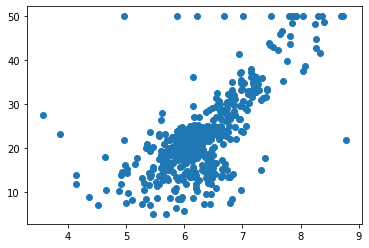

In [4]:
#将训练数据测试
plt.scatter(x,y)

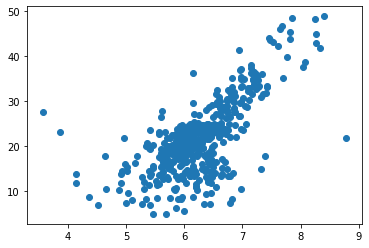

In [5]:
# 从上面可以看到数据的最顶层有一道横线，出现这个横线的可能有两种
#1.y 的高度不够，这里y 最大为 50，也许这个数据有 200,所以只能显示在50上
#2.这个值就是 50
#所以这里要现将 y>50 的数舍去
x = x[y<50]
y = y[y<50]
plt.scatter(x,y)

In [6]:
from pycharm_knn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [8]:
from LinearRegression.SimpleLinearRegression import SimpleLinearRegression

In [9]:
# 1.创建实例
reg = SimpleLinearRegression()

In [10]:
#2.数据的拟合
reg.fit(x_train,y_train)

SimpleLinearRegression()

In [11]:
print("a:"+str(reg.a_))
print("b:"+str(reg.b_))

a:7.8608543562689555
b:-27.459342806705543


In [12]:
#3.测试集
y_train_hat = reg.predict(x_train)

In [13]:
y_hat = reg.predict(x_test)

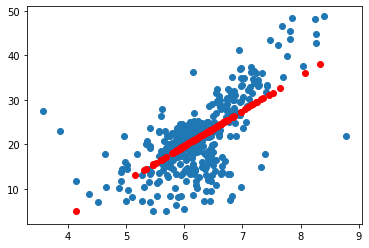

In [14]:
# 4.绘制图形
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_hat,color="red")

In [15]:
# 5.得到测试集的结果,接下来用不同的性能测试方式监测性能
y_predict = reg.predict(x_test)

### MSE
这个方法实现起来比较简单，但是这里生成的量纲是y量纲的平方

In [16]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

24.156602134387438

### RMSE
这个方法是上个方法的开根运算，这个生成的损失函数的量纲就与y的量纲一致了

In [17]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

### MAE
这个方法进行了取绝对值的处理，因为在数据拟合的时候我们已经生成了a,b。所以这里不用再次求导。经常训练数据与测试数据的模型是不一样的

In [18]:
mae_test = np.sum(np.absolute(y_test-y_predict))/len(y_test)
mae_test

3.5430974409463873

### 调用封装好的性能测试类

In [19]:
from pycharm_knn.metrics import mean_squared_error
from pycharm_knn.metrics import root_mean_squared_error
from pycharm_knn.metrics import mean_absolute_error

In [20]:
# mse 测试方法
mse_test2 = mean_squared_error(y_test,y_predict)
mse_test2

24.156602134387438

In [21]:
# rmse 测试方法
rmse_test2 = root_mean_squared_error(y_test,y_predict)
rmse_test2

4.914936635846635

In [22]:
# mas 测试方法
mae_test2 = mean_absolute_error(y_test,y_predict)
mae_test2

3.5430974409463873

### sklearn 的测试方法测试


In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [24]:
# 在sklearn 只有 mse 与 mae 没有 rmse 的方法，所以需要对 mse 开根变为 rmse 
mse = mean_squared_error(y_test,y_predict)
mse

24.156602134387438

In [25]:
rmse = sqrt(mean_squared_error(y_test,y_predict))
rmse

4.914936635846635

In [26]:
mae = mean_absolute_error(y_test,y_predict)
mae

3.5430974409463873

### R Square 评价性能
具体的使用可以看笔记

In [27]:
#1.基本实现原理
mean_squared_error(y_test, y_predict)/np.var(y_test)

0.38706831960626775

In [28]:
#2.调用自己封装的 R Square
from pycharm_knn.metrics import r2_score
r2_score(y_test, y_predict)

0.6129316803937322

In [29]:
# 3.调用 sklearn 的 R Square
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.6129316803937324

In [32]:
# 4.调用 SimpleRegression 生成器的 score 方法(有问题)
#sklearn 也是自带生成器的，但是那个生成器是面向多维的数据，这里仅仅涉及到一维的数据
from pycharm_knn.SimpleLinearRegression import score
reg.score(x_test, y_test)

ModuleNotFoundError: No module named 'metrics'